Welcome to DS0. This is the iPython Notebook that corresponds to the slides for the DS0 workshop. 

In [1]:
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Bad Visualization

We're going to use quite a few examples from Fox News to demonstrate bad visualization. While there is no doubt that other major news outlets also produce misleading graphs, these next few images are the most blatant for instruction purposes that I've discovered or have been shown. With this new eye for bad visualization, you will be able to spot misleading visualizations all across the spectrum! 

## NO: changing scale mid-axis

What does this mean?

It means the rate at which a quantitative variable is portrayed changes over the sequence. It's easier to understand as an example: 

![](axis.jpg) 

See how the x-axis goes from last year, to last week, to today? Why is that problematic?

## YES: keeping your scale consistent

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


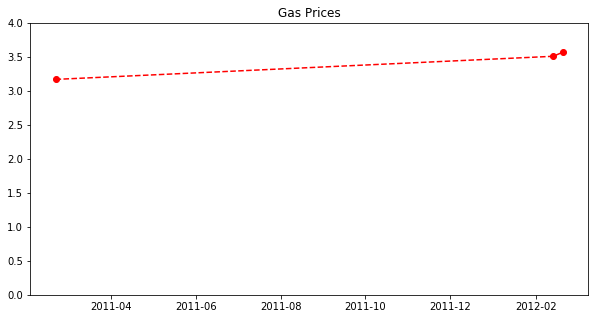

In [3]:
gas_dict = {'date':pd.to_datetime(['2011-02-20','2012-02-13','2012-02-20']), 'price':[3.17, 3.51, 3.57]}

gas_df = pd.DataFrame(gas_dict).set_index('date')


plt.figure(figsize=(10,5))

plt.plot(gas_df, marker='o', linestyle='--', color='red')
plt.ylim([0,4])
plt.title("Gas Prices")

plt.show()

## NO: pie graphs

![](Fox-News-pie-chart.png)

Why?

Confusing, misleading, and ugly. It's hard to tell the difference between 30% and 40% in a pie graph, even though that's a huge difference. Pie graphs may be okay for simple budgeting break-downs and expense reports, but in most data science scenarios, stay away from the pie graph. 

## YES: bar charts

Why?

Simple to read, exact, and pleasing to the eye. There is no confusion (as long as you have the right axis limits).

What if you don't have appropriate limits? 

 uh oh | oh no
- | - 
![alt](obc.jpg) | ![alt](Bush-cuts.png)

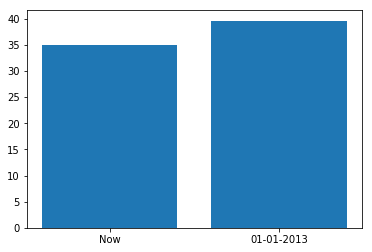

In [7]:
obc_dict = {'date':['March 27','March 31 (Goal)'], 'enrollment':[6000000, 7066000]}

obc_df = pd.DataFrame(obc_dict)

bush_dict = {'date':['Now', '01-01-2013'],'rate':[35, 39.6]}

bush_df = pd.DataFrame(bush_dict)

plt.bar(x=bush_df['date'], height='rate', data=bush_df)
#plt.ylim([34,42])

plt.show()

Which leads to our next point...

## NO: truncating when not necessary 

![](warren.png)

## YES: showing the big picture

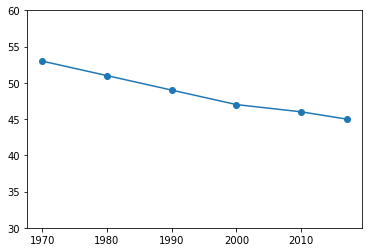

In [8]:
warr_dict = {'years':pd.to_datetime(['1970','1980','1990','2000','2010','2017']).year, 'rate':[53,51,49,47,46,45]}
warr_df = pd.DataFrame(warr_dict).set_index('years')

plt.plot(warr_df, marker='o')
plt.ylim([30,60])
plt.show()

# 3. Mean v. Median

The most straight-forward example of why you would use median over mean comes from income data. The concept is that medians are more descriptive of the "middle" of the data when you are dealing with distributions that are skewed. We will demonstrate with visuals to make understanding this clearer. 

In [14]:
incomes = pd.read_csv("acs2017_census_tract_data.csv")
incomes.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

6711.829265280925

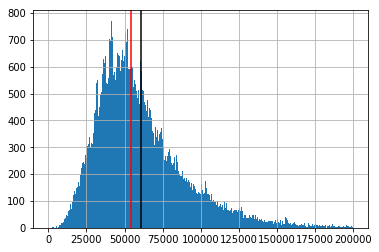

In [13]:
incomes['Income'].hist(bins=np.arange(0,200000,500))

plt.axvline(np.mean(incomes['Income'].dropna()), color='black')
plt.axvline(np.median(incomes['Income'].dropna()), color='red')

np.mean(incomes['Income'].dropna()) - np.median(incomes['Income'].dropna())

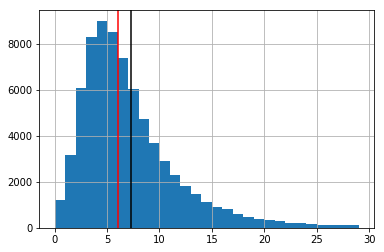

In [16]:
incomes['Unemployment'].hist(bins=np.arange(0,30,1))

plt.axvline(np.mean(incomes['Unemployment'].dropna()), color='black')
plt.axvline(np.median(incomes['Unemployment'].dropna()), color='red')

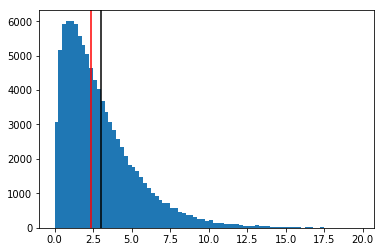

In [23]:
pois = np.random.chisquare(3, 100000)

plt.hist(pois, bins=np.arange(0,20,0.25))

plt.axvline(pois.mean(), color='black')
plt.axvline(np.median(pois), color='red')

plt.show()